# Script de Machine Learning Dataton BC 2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

## Train Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
#Carga de los datos

datos = pd.read_csv('/content/drive/MyDrive/DATATON/Dataset_limpios/train_limpio.csv',quotechar='"', iterator=True, chunksize=10000)
datos = pd.concat(datos, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/magics/execution.py:1193: DtypeWarning: Columns (20,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/execution.py:1193: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/execution.py:1193: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/execution.py:1193: DtypeWarning: Columns (34,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/execution.py:1193: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_me

CPU times: user 38.3 s, sys: 7.11 s, total: 45.4 s
Wall time: 58.4 s


In [ ]:
#Mostrar todas las col y filas & quitar notacion cientifica
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
#Correcion variable pol_centr_ext
datos['pol_centr_ext'] = datos['pol_centr_ext'].astype(float)


In [ ]:
#Cambiar tipo de datos a las variables numericas
datos['edad'] = datos['edad'].astype(float)
datos['mora_max'] = datos['mora_max'].astype(float)
datos['cant_moras_30_ult_12_meses'] = datos['cant_moras_30_ult_12_meses'].astype(float)
datos['cant_moras_60_ult_12_meses'] = datos['cant_moras_60_ult_12_meses'].astype(float)
datos['cant_moras_90_ult_12_meses'] = datos['cant_moras_90_ult_12_meses'].astype(float)
datos['nro_tot_cuentas'] = datos['nro_tot_cuentas'].astype(float)
datos['ctas_activas'] = datos['ctas_activas'].astype(float)
datos['ctas_embargadas'] = datos['ctas_embargadas'].astype(float)
datos['ind'] = datos['ind'].astype(float)
datos['cuota_cred_hipot'] = datos['cuota_cred_hipot'].astype(float)
datos['ingreso_final'] = datos['ingreso_final'].astype(float)
datos['cant_mora_30_tdc_ult_3m_sf'] = datos['cant_mora_30_tdc_ult_3m_sf'].astype(float)
datos['cant_mora_30_consum_ult_3m_sf'] = datos['cant_mora_30_consum_ult_3m_sf'].astype(float)
datos['cant_oblig_tot_sf'] = datos['cant_oblig_tot_sf'].astype(float)
datos['cant_cast_ult_12m_sr'] = datos['cant_cast_ult_12m_sr'].astype(float)
datos['ingreso_nomina'] = datos['ingreso_nomina'].astype(float)
datos['ingreso_segurida_social'] = datos['ingreso_segurida_social'].astype(float)

In [ ]:
#Porcentaje de missing value por columna
(datos.isna().sum()*100/len(datos))

Unnamed: 0                       0.00000
periodo                          0.00000
id_cli                           0.00000
fecha_nacimiento                 0.00000
edad                             0.00000
genero                           0.00036
estado_civil                     0.00000
nivel_academico                  0.00000
profesion                        0.00000
ocupacion                        0.00000
tipo_vivienda                    0.00000
ult_actual                       0.00000
categoria                        0.00000
codigo_ciiu                      0.00000
ind_mora_vigente                 0.00000
cartera_castigada                0.00000
ciudad_residencia                1.15130
departamento_residencia          0.00000
ciudad_laboral                  28.21994
departamento_laboral            28.94434
rechazo_credito                 99.45356
mora_max                         0.00000
cant_moras_30_ult_12_meses       0.00000
cant_moras_60_ult_12_meses       0.00000
cant_moras_90_ul

In [ ]:
#Cambiar tipo de datos a las variables string a Category
datos['categoria'] = datos['categoria'].astype('category')
datos['genero'] = datos['genero'].astype('category')
datos['estado_civil']= datos['estado_civil'].astype('category')
datos['nivel_academico']= datos['nivel_academico'].astype('category')
datos['profesion']= datos['profesion'].astype('category')
datos['ocupacion']= datos['ocupacion'].astype('category')
datos['tipo_vivienda']= datos['tipo_vivienda'].astype('category')
datos['ind_mora_vigente'] = datos['ind_mora_vigente'].astype('category')
datos['cartera_castigada']= datos['cartera_castigada'].astype('category')
datos['departamento_residencia'] = datos['departamento_residencia'].astype('category')

#Borradas en la imputacion
datos['ciudad_residencia']= datos['ciudad_residencia'].astype('category')
datos['ciudad_laboral']= datos['ciudad_laboral'].astype('category')
datos['departamento_laboral'] = datos['departamento_laboral'].astype('category')
datos['convenio_lib'] = datos['convenio_lib'].astype('category')

datos['rechazo_credito'] = datos['rechazo_credito'].astype('category')
datos['tenencia_tc'] = datos['tenencia_tc'].astype('category')
datos['tiene_ctas_activas'] = datos['tiene_ctas_activas'].astype('category')

#2da Iteracion
datos['tiene_consumo']  = datos['tiene_consumo'].astype('category')
datos['tiene_crediagil'] = datos['tiene_crediagil'].astype('category')
datos['tiene_ctas_embargadas'] = datos['tiene_ctas_embargadas'].astype('category')
datos['pension_fopep'] = datos['pension_fopep'].astype('category')
datos['tiene_cred_hipo_1'] = datos['tiene_cred_hipo_1'].astype('category')
datos['tiene_cred_hipo_2'] = datos['tiene_cred_hipo_2'].astype('category')


datos['cat_ingreso'] = datos['cat_ingreso'].astype('category')
datos['rep_calif_cred'] = datos['rep_calif_cred'].astype('category')


In [ ]:
# #Exploracion ingreso final
IQR = datos['gasto_familiar'].quantile(q=0.75)-datos['gasto_familiar'].quantile(q=0.25)
IQR*1.5


1124149.5

In [ ]:
# # #Quitar los datos atipicos del gasto
datos = datos[datos['gasto_familiar']<(1.5*IQR)]
datos = datos[datos['gasto_familiar']>=0]

In [ ]:
datos.shape

(3999989, 66)

### Dummies

In [ ]:
#Dataset para entrenar - definir las variables a incluir
#datos = datos[['ingreso_nompen','cat_ingreso','ingreso_final','cuota_de_vivienda','cuota_de_consumo','cuota_rotativos','cuota_tarjeta_de_credito','cuota_de_sector_solidario','cuota_sector_real_comercio','cuota_libranza_sf','ind','gasto_familiar']]

#Columnas eliminadas para la version con todos los datos
datos = datos.drop(columns=['profesion','ciudad_residencia','ciudad_laboral','departamento_laboral','rechazo_credito','convenio_lib'])
datos = datos.drop(columns=['tiene_ctas_embargadas','pension_fopep','tiene_cred_hipo_2']) #No se encontraron las mismas categorias en los datos test

filtro_df_kaggle = datos.columns

In [ ]:
#Crear las variables dummy
vbles_dummies = datos.loc[:,datos.dtypes == 'category'].columns

for i in vbles_dummies:
    print(i,len(datos.loc[:,i].unique()))

genero 3
estado_civil 7
nivel_academico 7
ocupacion 16
tipo_vivienda 4
categoria 5
ind_mora_vigente 2
cartera_castigada 2
departamento_residencia 36
tenencia_tc 2
tiene_consumo 2
tiene_crediagil 2
tiene_ctas_activas 1
tiene_cred_hipo_1 2
cat_ingreso 3
rep_calif_cred 8


In [ ]:
#Antes de las dummies
datos.shape

(3999989, 57)

In [ ]:
#Crear las variables dummy
vbles_dummies = datos.loc[:,datos.dtypes == 'category'].columns

In [ ]:
for i in vbles_dummies:
    datos = pd.get_dummies(datos, columns=[i],drop_first = True)

In [ ]:
print(datos.shape)
datos_dummies_columnas = datos.columns

(3999989, 126)


### Ajuste de tamaño para entrenar


In [ ]:
filas = 2000000 
datos = datos.sample(n=filas, random_state= 1)
datos.shape

(2000000, 126)

### Normalización

In [ ]:
#Noramlzacion del dataset completo
features = datos.loc[:, datos.columns!='gasto_familiar']
target = datos.loc[:,['gasto_familiar']]

scaler_x=MinMaxScaler()
scaler_x.fit(features)
features = scaler_x.transform(features)

scaler_y=MinMaxScaler()
scaler_y.fit(target)
target = scaler_y.transform(target)

In [ ]:
features.shape

(2000000, 125)

### PCA & Aplicación

In [ ]:
# #Instanciamos objeto PCA y aplicamos
pca=PCA(0.90)#otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(features) # obtener los componentes principales
#transformar el set
features = pca.transform(features)
print("shape of X_pca", features.shape[1])
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:(features.shape[1])]))
print(features[0:5])

shape of X_pca 36
[0.0774602  0.06313383 0.06219493 0.05648129 0.04887127 0.0475517
 0.04575026 0.03879694 0.03397506 0.03019553 0.0281492  0.02708845
 0.02668738 0.02459799 0.02305852 0.02150092 0.01973029 0.01856575
 0.01793922 0.0163231  0.01588524 0.01521164 0.01466826 0.01454755
 0.0135582  0.01210415 0.01106351 0.01058737 0.01036086 0.01026802
 0.0099041  0.00881998 0.00756818 0.00679524 0.00630993 0.00584549]
suma: 0.9015495646974436
[[ 5.75448981e-01 -6.15993549e-02 -9.84103496e-01 -2.60644720e-02
   1.48983724e-01 -1.17134658e+00  5.77914846e-01 -5.63028717e-01
  -1.86314307e-01  3.77045147e-01  2.66089701e-01 -2.60541582e-01
   1.89803431e-01 -8.15940069e-02 -5.12279210e-03 -1.10678308e-04
  -1.69111438e-01  5.46320076e-01 -2.15218187e-01 -3.81754131e-02
  -2.40458317e-01 -2.58048661e-02  7.27791748e-02  9.85684229e-02
   2.05837991e-01  1.46450438e-01 -2.37350324e-01 -1.08037131e-01
  -2.01477255e-02  1.67976021e-01 -2.19671674e-01  1.41115660e-01
  -9.08776437e-02  1.020221

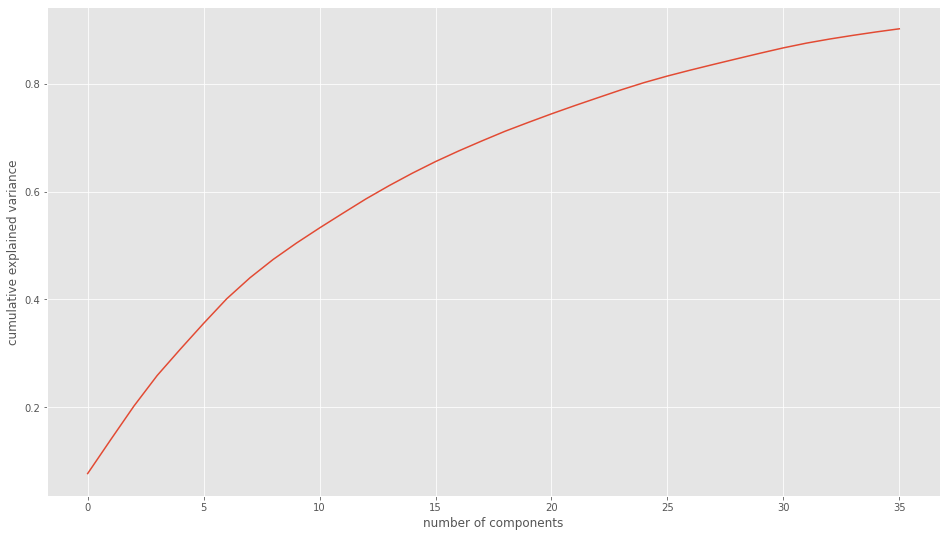

In [ ]:
# #definicion de parametros graficas
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Modelado

### Regresion Lineal

In [ ]:
#Entrenamiento completo
#importar el modelo a usar
from sklearn.linear_model import LinearRegression

#instanciamiento del modelo
regr = LinearRegression()

#Entrenamiento del modelo
regr.fit(features, y=target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Keras Neural Network

In [ ]:
#Importa las librerias necesarias
from numpy.random import seed
seed(1)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
from tensorflow import keras
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Reduccion de tamaño para la NN
features_NN = features[0:1500000]
target_NN = target[0:1500000]


### Red neuronal 1

In [ ]:
#Configuracion de la red

#input layer= number of features in training set + 1
#Hidden Layer= training data samples/factor*(in neurons+out neurons)
#Output layer = Default 1

#Uso elu porque procesa mejor los inputs negativos

#nota: a smaller number of epochs with a larger batch size was superior in predicting ADR.
tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(60)

in_layer = features_NN.shape[1]
out_layer = 1
hid_layer = (features_NN.shape[0])/(1*(in_layer+out_layer))

model_1 = Sequential()
model_1.add(Dense(in_layer, input_dim=in_layer, kernel_initializer='normal', activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(hid_layer, activation='relu'))
model_1.add(Dense(out_layer, activation='linear'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                1332      
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40540)             1499980   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 40541     
Total params: 1,541,853
Trainable params: 1,541,853
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
#Entrenamiento del modelo y prediccion
model_1.compile(loss='mse', optimizer='adam', metrics=['mape','mae'])
history_1=model_1.fit(features_NN, target_NN, epochs=30, batch_size=4096, verbose=1, validation_split=0.2)
####Epocas a 30, y drop a 0.3

Epoch 1/30
293/293 [==============================] - 20s 67ms/step - loss: 10842.6710 - mape: 10842.6710 - mae: 0.3390 - val_loss: 12644.7266 - val_mape: 12644.7266 - val_mae: 0.3398
Epoch 2/30
293/293 [==============================] - 19s 66ms/step - loss: 8958.0101 - mape: 8958.0101 - mae: 0.3393 - val_loss: 766.0953 - val_mape: 766.0953 - val_mae: 0.3397
Epoch 3/30
293/293 [==============================] - 19s 66ms/step - loss: 8199.5777 - mape: 8199.5777 - mae: 0.3394 - val_loss: 17659.2051 - val_mape: 17659.2051 - val_mae: 0.3399
Epoch 4/30
293/293 [==============================] - 19s 66ms/step - loss: 8500.1594 - mape: 8500.1594 - mae: 0.3391 - val_loss: 1662.8804 - val_mape: 1662.8804 - val_mae: 0.3397
Epoch 5/30
293/293 [==============================] - 19s 66ms/step - loss: 8660.3021 - mape: 8660.3021 - mae: 0.3390 - val_loss: 8530.5547 - val_mape: 8530.5547 - val_mae: 0.3398
Epoch 6/30
293/293 [==============================] - 19s 66ms/step - loss: 7842.4142 - mape: 78

dict_keys(['loss', 'mape', 'mae', 'val_loss', 'val_mape', 'val_mae'])


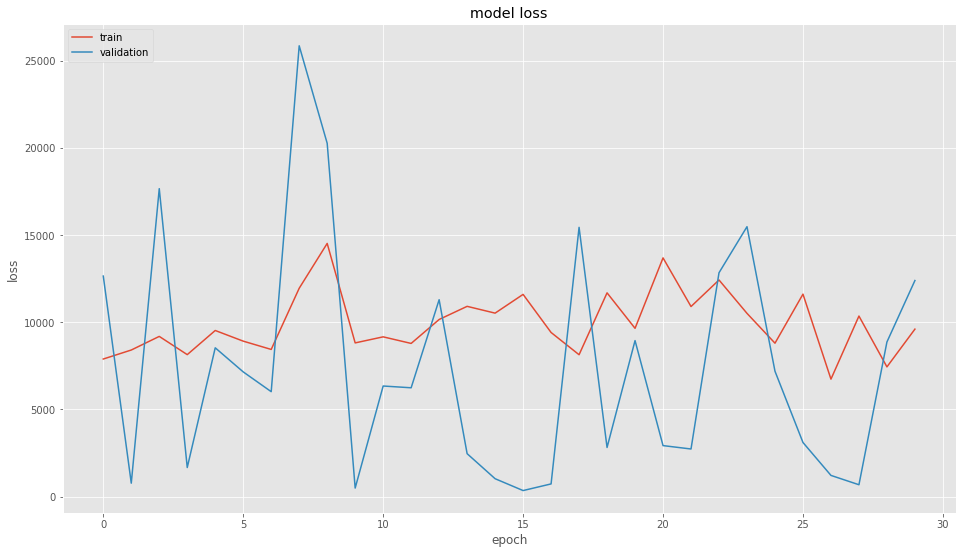

In [ ]:
#Grafica del entrenamiento
print(history_1.history.keys())
# "Loss"
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Red neuronal 2

In [ ]:
#configuracion red 2
tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(60)
model=keras.models.Sequential([
    
    keras.layers.Dense(512, input_dim = features_NN.shape[1], activation='relu'),
    keras.layers.Dropout(0.7),  
    keras.layers.Dense(512, input_dim = features_NN.shape[1], activation='relu'),
    keras.layers.Dropout(0.7),  
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.6),  
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.6),    
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=1, activation="linear"),
],name="Model_mod",)
model.summary()

Model: "Model_mod"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               18944     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65

In [ ]:
#Entrenamiento y evaluacion
model.compile(loss='mse', optimizer='adam', metrics=['mape','mae'])

history = model.fit(features_NN, target_NN,
                    epochs=100, batch_size=1024,
                    validation_split=0.3, 
                    verbose=1)

Epoch 1/100
1026/1026 [==============================] - 5s 4ms/step - loss: 2223821.6232 - mape: 2223821.6232 - mae: 0.3478 - val_loss: 8104.3843 - val_mape: 8104.3843 - val_mae: 0.3400
Epoch 2/100
1026/1026 [==============================] - 4s 4ms/step - loss: 11920.2261 - mape: 11920.2261 - mae: 0.3395 - val_loss: 8610.6855 - val_mape: 8610.6855 - val_mae: 0.3400
Epoch 3/100
1026/1026 [==============================] - 4s 4ms/step - loss: 11139.1920 - mape: 11139.1920 - mae: 0.3391 - val_loss: 12651.5146 - val_mape: 12651.5146 - val_mae: 0.3400
Epoch 4/100
1026/1026 [==============================] - 5s 5ms/step - loss: 13077.3739 - mape: 13077.3739 - mae: 0.3395 - val_loss: 18522.0469 - val_mape: 18522.0469 - val_mae: 0.3401
Epoch 5/100
1026/1026 [==============================] - 4s 4ms/step - loss: 10922.0655 - mape: 10922.0655 - mae: 0.3393 - val_loss: 15762.0088 - val_mape: 15762.0088 - val_mae: 0.3397
Epoch 6/100
1026/1026 [==============================] - 4s 4ms/step - loss

dict_keys(['loss', 'mape', 'mae', 'val_loss', 'val_mape', 'val_mae'])


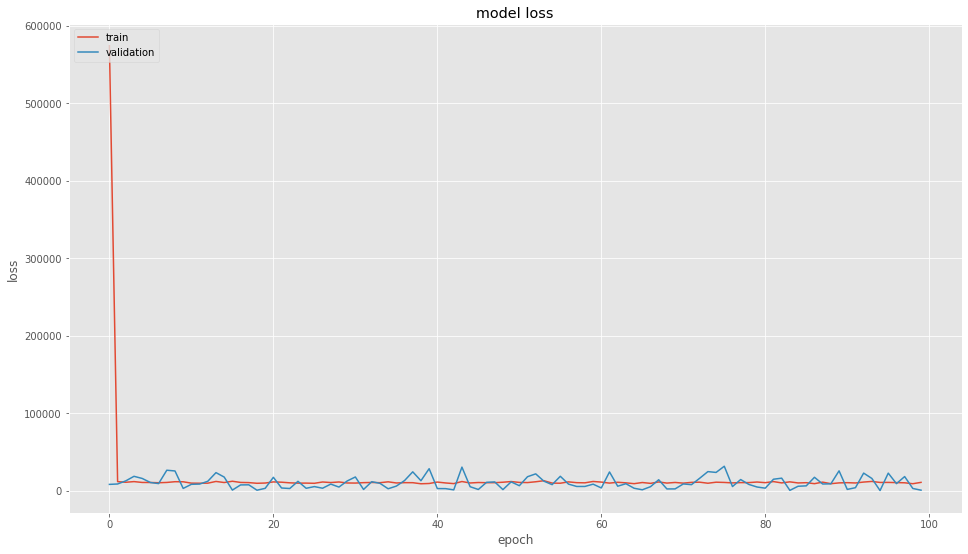

In [ ]:
#Grafica del entrenamiento
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Guardar los pesos de las capas
model_1.save_weights('/content/drive/MyDrive/DATATON/Pesos_modelo_1/pesos_{}_datos.tf'.format(filas), overwrite=True, save_format=None, options=None)
model.save_weights('/content/drive/MyDrive/DATATON/Pesos_modelo_2/pesos_{}_datos.tf'.format(filas), overwrite=True, save_format=None, options=None)

## Test Dataset

In [ ]:
#Importacion del set de test
datos_kaggle = pd.read_csv("/content/drive/MyDrive/DATATON/Dataset_limpios/test_limpio.csv",quotechar='"')

In [ ]:
#Correción del campo ciudad residencia
import re
datos_kaggle['ciudad_residencia'] = datos_kaggle.loc[datos_kaggle['ciudad_residencia'].notnull(),'ciudad_residencia'].apply(lambda x: x.strip())
datos_kaggle['ciudad_residencia'] = datos_kaggle.loc[datos_kaggle['ciudad_residencia'].notnull(),'ciudad_residencia'].apply(lambda x: re.sub(r'[#]','Ñ',x))
datos_kaggle['departamento_residencia'] = datos_kaggle.loc[datos_kaggle['departamento_residencia'].notnull(),'departamento_residencia'].apply(lambda x: x.strip())
datos_kaggle['departamento_residencia'] = datos_kaggle.loc[datos_kaggle['departamento_residencia'].notnull(),'departamento_residencia'].apply(lambda x: re.sub(r'[#]','Ñ',x))
datos_kaggle['ciudad_laboral'] = datos_kaggle.loc[datos_kaggle['ciudad_laboral'].notnull(),'ciudad_laboral'].apply(lambda x: x.strip())
datos_kaggle['ciudad_laboral'] = datos_kaggle.loc[datos_kaggle['ciudad_laboral'].notnull(),'ciudad_laboral'].apply(lambda x: re.sub(r'[#]','Ñ',x))
datos_kaggle['departamento_laboral'] = datos_kaggle.loc[datos_kaggle['departamento_laboral'].notnull(),'departamento_laboral'].apply(lambda x: x.strip())
datos_kaggle['departamento_laboral'] = datos_kaggle.loc[datos_kaggle['departamento_laboral'].notnull(),'departamento_laboral'].apply(lambda x: re.sub(r'[#]','Ñ',x))


In [ ]:
#Correccion de variables  Object y asignacion de tipo a la variable
datos_kaggle['edad'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['genero'].replace(' ', np.NaN, inplace = True)
datos_kaggle['estado_civil'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['nivel_academico'].replace('SIN INFORMACION', np.NaN, inplace = True)
datos_kaggle['profesion'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['ocupacion'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['ocupacion'].replace('Vacío', np.NaN, inplace = True)
datos_kaggle['tipo_vivienda'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['categoria'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['ind_mora_vigente'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['cartera_castigada'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['ciudad_residencia'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['ciudad_residencia'].replace('SIN INFORMACION', np.NaN, inplace = True)
datos_kaggle['departamento_residencia'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['departamento_residencia'].replace('SIN INFORMACION', np.NaN, inplace = True)
datos_kaggle['ciudad_laboral'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['ciudad_laboral'].replace('SIN INFORMACION', np.NaN, inplace = True)
datos_kaggle['departamento_laboral'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['departamento_laboral'].replace('SIN INFORMACION', np.NaN, inplace = True)
datos_kaggle['rechazo_credito'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['mora_max'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['cant_moras_30_ult_12_meses'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['cant_moras_60_ult_12_meses'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['cant_moras_90_ult_12_meses'].replace('\\N', np.NaN , inplace = True)

datos_kaggle['tiene_consumo'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['tiene_crediagil'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['tiene_ctas_activas'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['tiene_ctas_embargadas'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['pension_fopep'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['tiene_cred_hipo_1'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['tiene_cred_hipo_2'].replace('\\N', np.NaN , inplace = True)


datos_kaggle['nro_tot_cuentas'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['ctas_activas'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['ctas_embargadas'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['ind'].replace('\\N', np.NaN , inplace = True)

datos_kaggle['cuota_cred_hipot'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['cat_ingreso'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['ingreso_final'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['cant_mora_30_tdc_ult_3m_sf'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['cant_mora_30_consum_ult_3m_sf'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['cant_oblig_tot_sf'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['cant_cast_ult_12m_sr'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['rep_calif_cred'].replace('SIN INFO', np.NaN , inplace = True)
datos_kaggle['pol_centr_ext'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['convenio_lib'].replace('\\N', np.NaN, inplace = True)
datos_kaggle['ingreso_nomina'].replace('\\N', np.NaN , inplace = True)
datos_kaggle['ingreso_segurida_social'].replace('\\N', np.NaN , inplace = True)

In [ ]:
#Correcion variable pol_centr_ext
datos_kaggle['pol_centr_ext'] = datos_kaggle['pol_centr_ext'].astype(float)


In [ ]:
#Cambiar tipo de datos a las variables numericas
datos_kaggle['edad'] = datos_kaggle['edad'].astype(float)
datos_kaggle['mora_max'] = datos_kaggle['mora_max'].astype(float)
datos_kaggle['cant_moras_30_ult_12_meses'] = datos_kaggle['cant_moras_30_ult_12_meses'].astype(float)
datos_kaggle['cant_moras_60_ult_12_meses'] = datos_kaggle['cant_moras_60_ult_12_meses'].astype(float)
datos_kaggle['cant_moras_90_ult_12_meses'] = datos_kaggle['cant_moras_90_ult_12_meses'].astype(float)
datos_kaggle['nro_tot_cuentas'] = datos_kaggle['nro_tot_cuentas'].astype(float)
datos_kaggle['ctas_activas'] = datos_kaggle['ctas_activas'].astype(float)
datos_kaggle['ctas_embargadas'] = datos_kaggle['ctas_embargadas'].astype(float)
datos_kaggle['ind'] = datos_kaggle['ind'].astype(float)
datos_kaggle['cuota_cred_hipot'] = datos_kaggle['cuota_cred_hipot'].astype(float)
datos_kaggle['ingreso_final'] = datos_kaggle['ingreso_final'].astype(float)
datos_kaggle['cant_mora_30_tdc_ult_3m_sf'] = datos_kaggle['cant_mora_30_tdc_ult_3m_sf'].astype(float)
datos_kaggle['cant_mora_30_consum_ult_3m_sf'] = datos_kaggle['cant_mora_30_consum_ult_3m_sf'].astype(float)
datos_kaggle['cant_oblig_tot_sf'] = datos_kaggle['cant_oblig_tot_sf'].astype(float)
datos_kaggle['cant_cast_ult_12m_sr'] = datos_kaggle['cant_cast_ult_12m_sr'].astype(float)
datos_kaggle['ingreso_nomina'] = datos_kaggle['ingreso_nomina'].astype(float)
datos_kaggle['ingreso_segurida_social'] = datos_kaggle['ingreso_segurida_social'].astype(float)

In [ ]:
#Correccion nomenclatura categoria
datos_kaggle['categoria'] = datos_kaggle['categoria'].astype('int')


In [ ]:
#Cambiar tipo de datos_kaggle a las variables string a Category
datos_kaggle['categoria'] = datos_kaggle['categoria'].astype('category')
datos_kaggle['genero'] = datos_kaggle['genero'].astype('category')
datos_kaggle['estado_civil']= datos_kaggle['estado_civil'].astype('category')
datos_kaggle['nivel_academico']= datos_kaggle['nivel_academico'].astype('category')
datos_kaggle['profesion']= datos_kaggle['profesion'].astype('category')
datos_kaggle['ocupacion']= datos_kaggle['ocupacion'].astype('category')
datos_kaggle['tipo_vivienda']= datos_kaggle['tipo_vivienda'].astype('category')
datos_kaggle['ind_mora_vigente'] = datos_kaggle['ind_mora_vigente'].astype('category')
datos_kaggle['cartera_castigada']= datos_kaggle['cartera_castigada'].astype('category')
datos_kaggle['departamento_residencia'] = datos_kaggle['departamento_residencia'].astype('category')

#Borradas en la imputacion
datos_kaggle['ciudad_residencia']= datos_kaggle['ciudad_residencia'].astype('category')
datos_kaggle['ciudad_laboral']= datos_kaggle['ciudad_laboral'].astype('category')
datos_kaggle['departamento_laboral'] = datos_kaggle['departamento_laboral'].astype('category')
datos_kaggle['convenio_lib'] = datos_kaggle['convenio_lib'].astype('category')

datos_kaggle['rechazo_credito'] = datos_kaggle['rechazo_credito'].astype('category')
datos_kaggle['tenencia_tc'] = datos_kaggle['tenencia_tc'].astype('category')
datos_kaggle['tiene_ctas_activas'] = datos_kaggle['tiene_ctas_activas'].astype('category')

#2da Iteracion
datos_kaggle['tiene_consumo']  = datos_kaggle['tiene_consumo'].astype('category')
datos_kaggle['tiene_crediagil'] = datos_kaggle['tiene_crediagil'].astype('category')
datos_kaggle['tiene_ctas_embargadas'] = datos_kaggle['tiene_ctas_embargadas'].astype('category')
datos_kaggle['pension_fopep'] = datos_kaggle['pension_fopep'].astype('category')
datos_kaggle['tiene_cred_hipo_1'] = datos_kaggle['tiene_cred_hipo_1'].astype('category')
datos_kaggle['tiene_cred_hipo_2'] = datos_kaggle['tiene_cred_hipo_2'].astype('category')


datos_kaggle['cat_ingreso'] = datos_kaggle['cat_ingreso'].astype('category')
datos_kaggle['rep_calif_cred'] = datos_kaggle['rep_calif_cred'].astype('category')

### Dummies

In [ ]:
datos_kaggle.shape

(281666, 66)

In [ ]:
#variables_entrenar = ['ingreso_nompen','cat_ingreso','ingreso_final','cuota_de_vivienda','cuota_de_consumo','cuota_rotativos','cuota_tarjeta_de_credito','cuota_de_sector_solidario','cuota_sector_real_comercio','cuota_libranza_sf','ind']
variables_entrenar = [] #usar cuando se cambian las variables de entrenamiento
for i in filtro_df_kaggle:
    if i in datos_kaggle.columns:
        variables_entrenar.append(i)
print(len(variables_entrenar))

56


In [ ]:
#Dataset para normalizar y guardar el id_registro
df_final_kaggle1 = datos_kaggle[['id_registro']]
datos_kaggle = datos_kaggle[variables_entrenar]


In [ ]:
#Crear las variables dummy
vbles_dummies = datos_kaggle.loc[:,datos_kaggle.dtypes == 'category'].columns

In [ ]:
for i in vbles_dummies:
    datos_kaggle = pd.get_dummies(datos_kaggle, columns=[i],drop_first = True)

In [ ]:
print(datos_kaggle.shape)


(281666, 125)


In [ ]:
#Validar cual es las dummies que faltan
for i in datos_dummies_columnas:
  if i not in datos_kaggle.columns:
    print(i)

print('\n')

for i in datos_kaggle.columns:
  if i not in datos_dummies_columnas:
    print(i)

gasto_familiar




In [ ]:
datos_kaggle.columns

Index(['Unnamed: 0', 'periodo', 'id_cli', 'fecha_nacimiento', 'edad',
       'ult_actual', 'codigo_ciiu', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses',
       ...
       'tiene_cred_hipo_1_X', 'cat_ingreso_NOM PEN', 'cat_ingreso_PEN',
       'rep_calif_cred_B', 'rep_calif_cred_C', 'rep_calif_cred_D',
       'rep_calif_cred_E', 'rep_calif_cred_F', 'rep_calif_cred_G',
       'rep_calif_cred_H'],
      dtype='object', length=125)

### Normalizacion


In [ ]:
#Noramlzacion del dataset completo
scaler_kaggle=MinMaxScaler()
scaler_kaggle.fit(datos_kaggle)
data_kaggle_norm = scaler_kaggle.transform(datos_kaggle)

### Aplicar PCA

In [ ]:
#Ajustar al pca aplicado
data_kaggle_norm = pca.transform(data_kaggle_norm)

## Predicción

In [ ]:
#Predicion de la NN_1
pred_mod_nn_1 = model_1.predict(data_kaggle_norm)

#Predicion de la NN_2
pred_mod_nn_2 = model.predict(data_kaggle_norm)

#Predicion de la regresion
pred_mod_reg = regr.predict(data_kaggle_norm)



In [ ]:
#Revertir la normalizacion de la predicion
pred_mod_nn_1 = scaler_y.inverse_transform(pred_mod_nn_1)
pred_mod_nn_2 = scaler_y.inverse_transform(pred_mod_nn_2)
pred_mod_reg = scaler_y.inverse_transform(pred_mod_reg)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


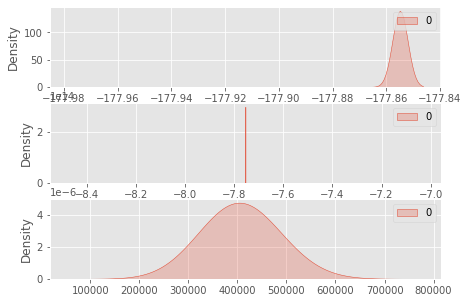

In [ ]:
#Exploracion de las predicciones
f, axes = plt.subplots(3, 1)
f.set_figheight(5)
f.set_figwidth(7)

sns.kdeplot(data = pred_mod_nn_1, shade = True, bw=1.5, ax=axes[0])
sns.kdeplot(data = pred_mod_nn_2, shade = True, bw=1.5, ax=axes[1])
sns.kdeplot(data = pred_mod_reg, shade = True, bw=1.5, ax=axes[2])


plt.show()

### Export de respuestas

In [ ]:
#Creacion del dataset para cargar y exportar a csv
df_final_kaggle1['gasto_familiar'] = pred_mod_nn_1
df_final_kaggle1.to_csv("/content/drive/MyDrive/DATATON/Respuestas_kaggle/data_submission_nn_1.csv", index = False)

df_final_kaggle1['gasto_familiar'] = pred_mod_nn_2
df_final_kaggle1.to_csv("/content/drive/MyDrive/DATATON/Respuestas_kaggle/data_submission_nn_2.csv", index = False)

df_final_kaggle1['gasto_familiar'] = pred_mod_reg
df_final_kaggle1.to_csv("/content/drive/MyDrive/DATATON/Respuestas_kaggle/data_submission_rl_1.csv", index = False)